# Assignment 1 - Part B2: Working with you own data 

In this assignment you will create you own dataset for classification. You will explore which ML algorithms are best to classify this and you will present your best solution. 

### Generating your dataset:

For this assignment you will create your own dataset of motions that you collect with an Accelerometer and Gyroscope. For this you can use your phone as a sensor.
To be able to collect your data you can best use an app called [phyphox](https://phyphox.org/), this is a free app available in app stores. This app can be configured to acces your sensordata, sample it as given frequency's. you can set it up te have experiment timeslots, and the data with a timestamp can be exported to a needed output format.

![](https://phyphox.org/wp-content/uploads/2019/06/phyphox_dark-1024x274.png)

When you installed the app you can setup a custum experiment by clicking on the + button. Define an experiment name, sample frequency and activate the Accelerometer and Gyroscope. Your custom experiment will be added, you can run it pressing the play button and you will see sensor motion. Pressing the tree dots (...) lets you define timed runs, remote access and exporting data.

### steps

With your own generated dataset the similar sequence of steps should be taken to train your model.

These are the generic steps to be taken
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
9. Additional Questions


---
In the Notebook this structure is used for dividing the different steps, so make sure you do the implementation and analisis at these location in the notebook. 

You may add additinal code blocks, but keep the seperation of the given structure.

At the end of each block summarize / comment / conclude your current step in the given textblocks.


### Hints

Additional info can be found in the tips and trick document

```
Imad Hanzaz, Yannick Urselmann, Jaylong Verschuren
```


# 1. Frame the problem and look at the big picture
Describe the problem at hand and explain your approach

The final assignment of AIS consists out of making a dataset and training a classifier. The biggest problem lies in the combining of the measured data. 
The dataset consists out of accelerometer and gyroscope data from three people doing three sepperate excersises multiple times.

We have to chose three  for the model to learn and classify. For this assignment we chose to do three excersises (push-ups, squads and squads) which get you in shape.
After the movements were chosen we have:
* Start and collect the data.
* Sort and name all collected data.
* Checking and cleaning of the data.
* Combining all the of the three seperate people to a single dataset.
* The data has to be imported.
* Framing, encoding and scaling of date.
* The data will be split for train and testing.
* Try out different models.
* Fine tuning of the models and picking the best.

# 2. Get the data.

Initialize the system, get all needed libraries, retreive the data and import it

> Create your own dataset

> Explain and show (with a few images) which motions you are classifing, how you generated them, what the problems where you encountered in this process! 


![image info](./img/Fitness-challeng.jpg)

For our dataset, we want to take the fitness challenge as dataset. This consists out of squads, jumping jacks and pushups. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


data = pd.read_csv("./imadyannickjaylong.csv")


In [2]:
data

,X (m/s^2),Y (m/s^2),Z (m/s^2),X (rad/s),Y (rad/s),Z (rad/s),Subject,Activity
0,-3.298092,-8.242160,-1.299148,-0.232351,-0.387127,-0.468749,1,Jumping
1,-3.428620,-8.226742,-1.342558,-0.236278,-0.275373,-0.451109,1,Jumping
2,-3.196902,-8.143815,-1.588796,-0.193396,-0.289539,-0.444967,1,Jumping
3,-2.365231,-7.839947,-1.751957,-0.070750,-0.466346,-0.412877,1,Jumping
4,-1.199456,-7.485334,-2.040257,0.104060,-0.696491,-0.350199,1,Jumping
...,...,...,...,...,...,...,...,...
27033,0.544367,-2.727220,-9.972089,0.545266,-0.116643,0.046071,3,Squads
27034,0.649651,-2.755934,-10.024731,0.601723,-0.149665,0.054593,3,Squads
27035,0.888934,-2.880360,-10.546964,0.651789,-0.181622,0.054593,3,Squads
27036,1.037289,-3.047858,-10.724631,0.683746,-0.199731,0.051397,3,Squads


The dataset is created out of multiple datasets. Each dataset contained Accelerometer data and Gyroscope data. <br>
This data was merged per subject and activity. And eventually all datasets were merged into one big dataset.

# 3. Explore the data to gain insights.

Explore the data in any possible way, visualize the results (if you have multiple plots of the same kind of data put them in one larger plot)

In [3]:
data.describe()

,X (m/s^2),Y (m/s^2),Z (m/s^2),X (rad/s),Y (rad/s),Z (rad/s),Subject
count,27038.000000,27038.000000,27038.000000,27038.000000,27038.000000,27038.000000,27038.000000
mean,-0.592391,-5.665707,0.245551,-0.004824,-0.003137,0.001249,2.003551
std,4.491468,7.423837,6.367311,0.992369,0.485022,0.567056,0.815794
min,-18.016159,-62.384421,-20.938309,-4.133873,-4.375205,-3.407856,1.000000
25%,-3.547126,-7.973809,-3.312899,-0.454251,-0.201862,-0.264488,1.000000
50%,-0.515004,-3.596496,-0.451686,-0.008862,-0.006090,-0.006128,2.000000
75%,1.784520,-0.747134,6.547361,0.500222,0.192791,0.285762,3.000000
max,16.475190,5.469476,23.863376,3.405314,5.337268,2.165069,3.000000


In [4]:
data.shape

(27038, 8)

In [5]:
data.isna().sum()

X (m/s^2)    0
Y (m/s^2)    0
Z (m/s^2)    0
X (rad/s)    0
Y (rad/s)    0
Z (rad/s)    0
Subject      0
Activity     0
dtype: int64

[]

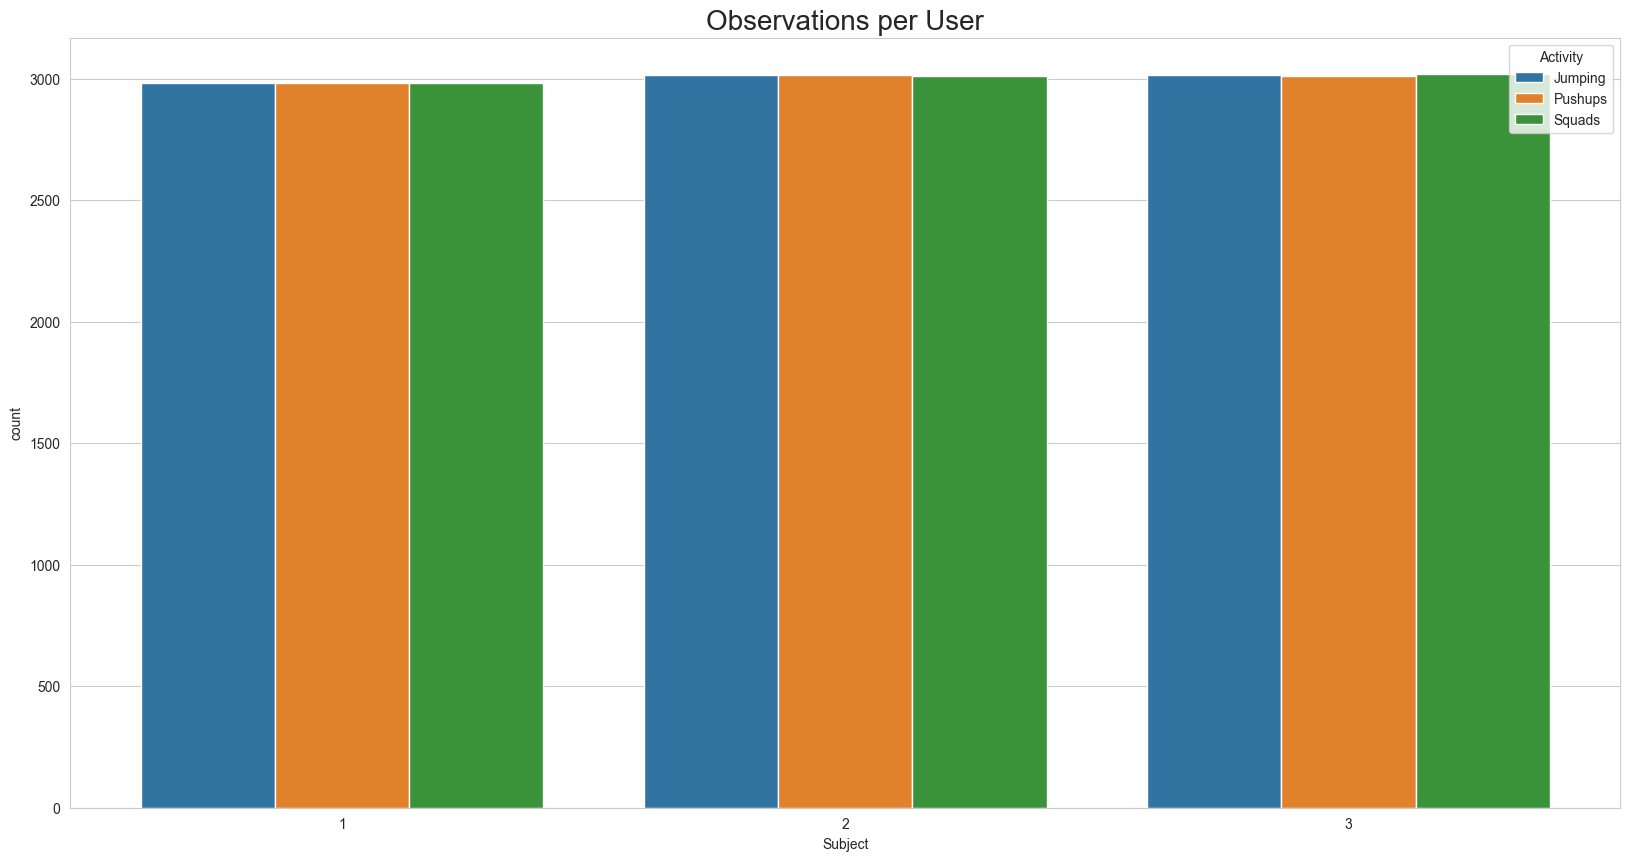

In [6]:
# Plotting data with respect to subject
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.title('Observations per User', fontsize=20)
sns.countplot(x='Subject', hue='Activity', data=data)
plt.plot()

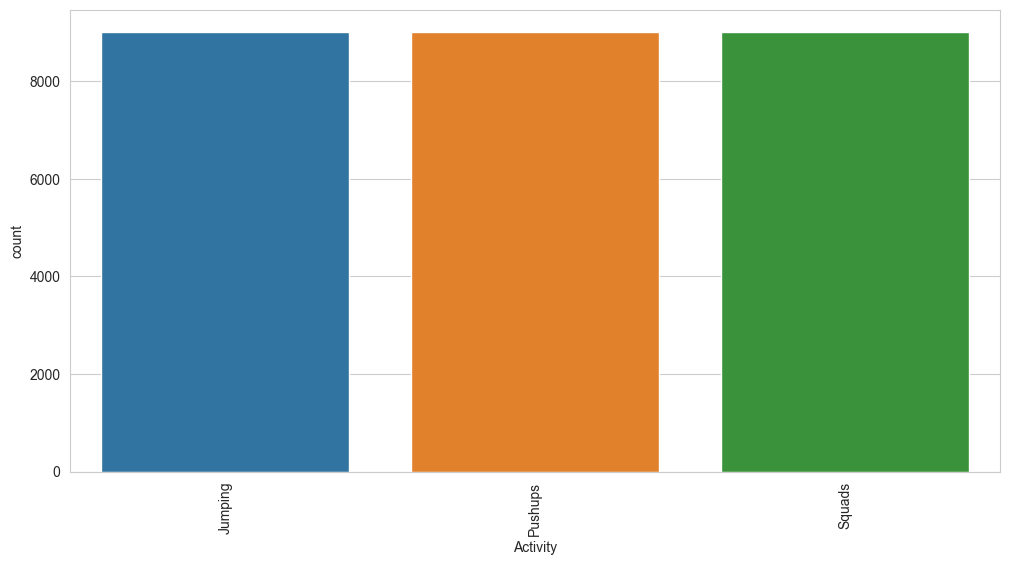

In [7]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=data)
plt.xticks(x=data['Activity'],rotation='vertical')
plt.show()

In [8]:
label_counts_for_train = data['Activity'].value_counts()

colors = px.colors.qualitative.Plotly


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_train.index, values=label_counts_for_train.values, name="Train Set"), 1, 1)

fig.update_layout(
    height=450, width=700,
    title = 'Activity Counts Distribution For Train set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
    title_font=dict(size=25, color='#a5a7ab', family='verdana'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8c8f63'))
# graph = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))
fig.show()

c:\Users\yanni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\yanni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 27038 samples in 0.016s...
[t-SNE] Computed neighbors for 27038 samples in 0.988s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27038
[t-SNE] Computed conditional probabilities for sample 2000 / 27038
[t-SNE] Computed conditional probabilities for sample 3000 / 27038
[t-SNE] Computed conditional probabilities for sample 4000 / 27038
[t-SNE] Computed conditional probabilities for sample 5000 / 27038
[t-SNE] Computed conditional probabilities for sample 6000 / 27038
[t-SNE] Computed conditional probabilities for sample 7000 / 27038
[t-SNE] Computed conditional probabilities for sample 8000 / 27038
[t-SNE] Computed conditional probabilities for sample 9000 / 27038
[t-SNE] Computed conditional probabilities for sample 10000 / 27038
[t-SNE] Computed conditional probabilities for sample 11000 / 27038
[t-SNE] Computed conditional probabilities for sample 12000 / 27038
[t-SNE] Computed conditional probabilities for sa

<AxesSubplot: >

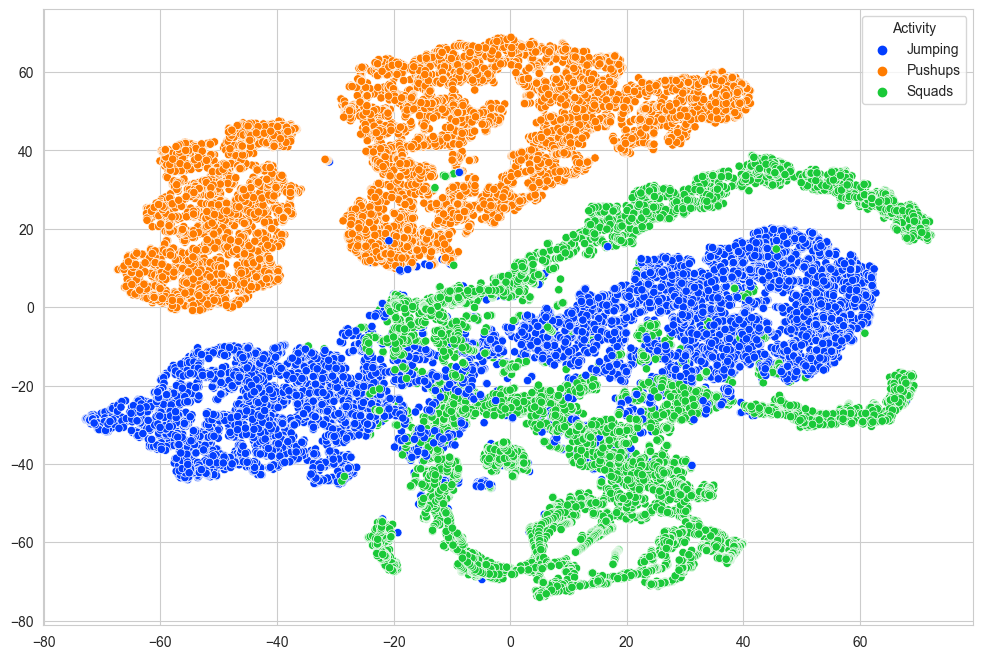

In [9]:
# t-sne (2D)
x_for_tsne = data.drop(['Subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 22, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = data["Activity"],palette="bright")

The data is then validated to check if it is correct. 
* There is no missing data.
* The activities are equally divided per person and in general. 
* Every person took a recording of the activity with the same time periods.
* In the T-SNE a clear division of the activities is seen. Squads and jumps are pretty equal to eachother but pushups differ alot.

# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

prepare your data, is it normalized? are there outlier? Make a training and a test set.

In [10]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Subject'], name="Train Set", notched=True))

fig.update_xaxes(showgrid=False)
fig.update_layout(
    height=450, width=700,
    title = 'Activity count distribution Train',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
    title_font=dict(size=25, color='#a5a7ab', family='verdana'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8c8f63'))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(boxpoints='all', jitter=0)

In [11]:
X=pd.DataFrame(data.drop(['Activity','Subject'],axis=1))
y=data.Activity.values.astype(object)

In [12]:
from sklearn import preprocessing

encoder=preprocessing.LabelEncoder()

encoder.fit(y)
y=encoder.transform(y)
y.shape


(27038,)

In [13]:
encoder.classes_

array(['Jumping', 'Pushups', 'Squads'], dtype=object)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X=scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 100)
    

In [16]:
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((18926, 6), (18926,), (8112, 6), (8112,))

In [17]:
X_train

array([[ 0.55703603, -0.75035235, -0.38731196, -0.47617593,  0.12396945,
        -0.2177679 ],
       [-0.92193536, -0.07847834, -0.56228328, -1.90586235, -0.2558145 ,
         0.21386489],
       [-0.44761176, -2.64907888,  0.50889772,  0.8135235 ,  4.16737873,
        -0.49003324],
       ...,
       [-1.27777805,  0.9839231 ,  1.18914139, -0.40885231,  0.56501094,
        -0.60473505],
       [ 1.08180295,  0.22547797,  1.0694958 ,  0.19687378, -0.36580541,
        -0.32860334],
       [-1.46444798,  0.63112009,  1.49911245,  0.47972471, -0.2289174 ,
         0.47825443]])

In [18]:
y_train

array([0, 2, 0, ..., 1, 1, 1])

Then we check for outliers, and prepare the data for model training.
* First, we make the input data by removing the subject and activity columns.
* Then we prepare the output data by assigning the activity to it.
* After that, the output data is given a integer value instead of a string containing the activity to make training simpler.
* The output values are scaled
* All data is split into training and testing data with a division of 70%/30%.

# 5. Explore many different models and short-list the best ones.

Explore / train and list the top 3 algorithms that score best on this dataset.

### SVC Classification
* Here a model is trained with SVC classification model. The model is not tweaked at this point but has a good accuracy score of 95.97%. A confusion matrix is made to visualise the TP, TN, FP, FN. As seen the most are true positive.

In [19]:
svc=SVC()

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

accSVC = accuracy_score(y_test, y_pred)*100


print(f"SVC Model has an accuracy score of {accSVC} %")


SVC Model has an accuracy score of 95.9689349112426 %


In [20]:
svcConf = confusion_matrix(y_test, y_pred)
fig = px.imshow(svcConf, text_auto=True, width= 400)
fig.show()


### Random Forest Classification
* Here a model is trained with a Random Forest classification model. The model is also not tweaked at this point but has a good accuracy score of 97.97%. Also a confusion matrix is made to visualise the TP, TN, FP, FN. As seen the most are true positive.

In [21]:
rand_clf=RandomForestClassifier()

rand_clf.fit(X_train,y_train)

y_pred=rand_clf.predict(X_test)

accRandomForest = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"Random Forest Classifier has an accuracy score of: {accRandomForest} %")


Random Forest Classifier has an accuracy score of: 97.9043392504931 %


In [22]:
z = confusion_matrix(y_test, y_pred)

fig = px.imshow(z, text_auto=True, width= 400)
fig.show()

### KNN Classification
* Here a model is trained with KNN classification model. The model is also not tweaked at this point but has a good accuracy score of 97.62%. Also a confusion matrix is made to visualise the TP, TN, FP, FN. As seen the most are also true positive.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
accKNN = accuracy_score(y_test, y_pred)*100

print(f"KNN Model has an accuracy score of {accKNN}")

KNN Model has an accuracy score of 97.62080867850098


In [24]:
knnConf = confusion_matrix(y_test, y_pred)

fig = px.imshow(knnConf, text_auto=True, width= 400)
fig.show()

# 6. Fine-tune your models and combine them into a great solution.

can you get better performance within a model? e.g if you use a KNN classifier how does it behave if you change K (k=3 vs k=5 vs k=?). Which parameters are here to tune in the chosen models? 

### SVC Classification (fine tuned)

A rbf kernel is added to the SVC model. C is set to 23 which tells the optimization how much missclassifying is avoided each training example.

In [25]:
svc=SVC(kernel='rbf', C=23)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
accSVCfinetuned = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"SVC Model has an accuracy score of {accSVCfinetuned} %")


SVC Model has an accuracy score of 96.99211045364892 %


In [26]:
svcConf = confusion_matrix(y_test, y_pred)
fig = px.imshow(svcConf, text_auto=True, width= 400)
fig.show()

### Random Forest Classification (fine tuned)

The random forest classifier gets a random state of 5 in this optimazation. This improves the accuracy slightly.

In [27]:
rand_clf=RandomForestClassifier(random_state=5)

rand_clf.fit(X_train,y_train)

y_pred=rand_clf.predict(X_test)

accRandomForestfinetuned = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"Finetuned Random Forest Classifier has an accuracy of: {accRandomForestfinetuned} %")

Finetuned Random Forest Classifier has an accuracy of: 97.95364891518737 %


In [28]:
z = confusion_matrix(y_test, y_pred)

fig = px.imshow(z, text_auto=True, width= 400)
fig.show()

### KNN Classification (fine tuned)

Here the KNN is optimized by setting the weights parameter to 'distance' in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away from the query point. The algorithm is set to 'kd_tree' and the number of neighbors is set to 3.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance', n_neighbors=3, algorithm='kd_tree')
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)

accKNNfinetuned = accuracy_score(y_test, y_pred)*100

print(f"Finetuned KNN Model accuracy score is {accKNNfinetuned} %")

Finetuned KNN Model accuracy score is 97.6577909270217 %


In [30]:
knnConf = confusion_matrix(y_test, y_pred)

fig = px.imshow(knnConf, text_auto=True, width= 400)
fig.show()

# 7. Present your solution.

Explain why you would choose for a specific model

In [31]:
import plotly.express as px

d = {'classifier': ["SVC","Random Forest","KNN","SVC","Random Forest","KNN"], 
     'percentage': [accSVC, accRandomForest, accKNN, accSVCfinetuned, accRandomForestfinetuned, accKNNfinetuned], 
     'finetuned': ["no", "no", "no", "yes", "yes", "yes"]}

df = pd.DataFrame(data=d)
df


,classifier,percentage,finetuned
0,SVC,95.968935,no
1,Random Forest,97.904339,no
2,KNN,97.620809,no
3,SVC,96.992110,yes
4,Random Forest,97.953649,yes
5,KNN,97.657791,yes


### Histogram of the models (non-finetuned vs. finetuned)

In [32]:
fig = px.histogram(df, x="classifier", y="percentage",
             color='finetuned', barmode='group',
             height=400, text_auto=True)
fig.update_layout(yaxis_range=[85,100], 
                  yaxis=dict(title='Accuracy',showgrid=False),
                  xaxis=dict(title='Classifier',showgrid=False),
                  title="Accuracy scores of different classifiers (Non-Finetuned vs. Finetuned)"
                  )
fig.show()


The Random Forest classifier got the best accuracy. After finetuning it was concluded that at this point the standard parameters were optimal. <br> KNN is a very close second option with little added benefit in finetuning. <br> The SVC classifier has experienced the biggest benefit from finetuning but ended last place.

# 8. Launch, monitor, and maintain your system.

Can you Deployment the model? <br> <br>
At this moment we cannot deploy the model, as we are experiencing issues with remote access

> NOTE: The app provides the option for remote access, so you are able to get live sensordata from the phone

# 9. Additional Questions

**Explain the chosen motions you chose to be classified?**<br>
All three of the motions chosen have a distinct accelerometer or gyroscope reading. 
* Jumping jacks have high accelerations and deccelerations as the person has to come off of and land on the ground.
* Push ups are primarily up and down movements (acceleration) with a small rotations for the gyroscope.
* And finally, Squads have large rotation as the phone in a pocket goes from vertical to horizontal which changes the direction of acceleration.

**Which of these motions is easier/harder to classify and why?**<br>
Push ups and squads both have a slower acceleration and deceleration than the jumping jacks. This will cause overlap in the measurements. Both will also havo a rotation. This is far smaller on the push than the situps but will still also cause some overlap.

**After your experience, which extra sensor data might help getting a better classifier and why?**<br>
At this point we don't have a reconmendation for added/different sensors. As the motions are well distinguishable already.

**Explain why you think that your chosen algorithm outperforms the rest?**<br>
The random forest algorithm outperforms the rest because it can classify the minimal amount of activites very well. 
**While recording the same motions with the same sensor data, what do you think will help improving the performance of your models?**<br>
Optimization of the data could be done better. By adding average and mean values performance may be improve.
